## Analyzing and Predicting Stock Market Prices Using Auto-ARIMA Model

In [1]:
import pandas as pd

### Data Analyzing

In [2]:
dataset=pd.read_csv("/Users/altayavci/Documents/Data Science/UdemyProjects/StockMarket/Data/BAJFINANCE.csv")

In [3]:
dataset["Date"]=pd.to_datetime(dataset["Date"])
dataset.set_index("Date",inplace=True)

In [4]:
dataset.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

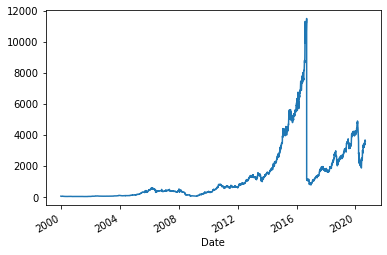

In [5]:
dataset["VWAP"].plot()
#Volume-weighted average price (VWAP) is a metric that shows the average price of a stock adjusted for its volume.

In [6]:
dataset.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [7]:
dataset.dropna(inplace=True)

In [8]:
dataset.isna().sum().any()

False

In [9]:
df=dataset.copy()

In [10]:
df.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

## Data Prep For the ARIMA (moving average) Model

In [11]:
lag_features=["High","Low","Volume","Turnover","Trades"]

In [12]:
for feature in lag_features:
    
    df[feature+"rolling_mean_3"]=df[feature].rolling(window=3).mean()
    df[feature+"rolling_mean_7"]=df[feature].rolling(window=7).mean()
    
    df[feature+"rolling_std_3"]=df[feature].rolling(window=3).std()
    df[feature+"rolling_std_7"]=df[feature].rolling(window=7).std() 

#Since the ARIMA moving average model works with correlation calculation, we need to do shifting. For this, we used the rolling() method.


In [13]:
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Highrolling_std_3', 'Highrolling_std_7', 'Lowrolling_mean_3',
       'Lowrolling_mean_7', 'Lowrolling_std_3', 'Lowrolling_std_7',
       'Volumerolling_mean_3', 'Volumerolling_mean_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Turnoverrolling_std_3',
       'Turnoverrolling_std_7', 'Tradesrolling_mean_3', 'Tradesrolling_mean_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [14]:
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [15]:
df.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isna().sum().any()

False

In [18]:
df.shape

(2285, 34)

## Build the Auto-ARIMA Model

In [19]:
X_train=df[0:1800]
X_test=df[1800:]

In [20]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [21]:
model=auto_arima(y=X_train["VWAP"],exogenous=X_train[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.554, Time=1.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.239, Time=0.91 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.364, Time=0.95 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.336, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=0.87 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.249, Time=1.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 6.070 seconds


In [22]:
model.fit(X_train["VWAP"],X_train[ind_features])

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [23]:
prediction=model.predict(n_periods=len(X_test),exogenous=X_test[ind_features])

In [24]:
X_test["Prediction"]=prediction

<AxesSubplot:xlabel='Date'>

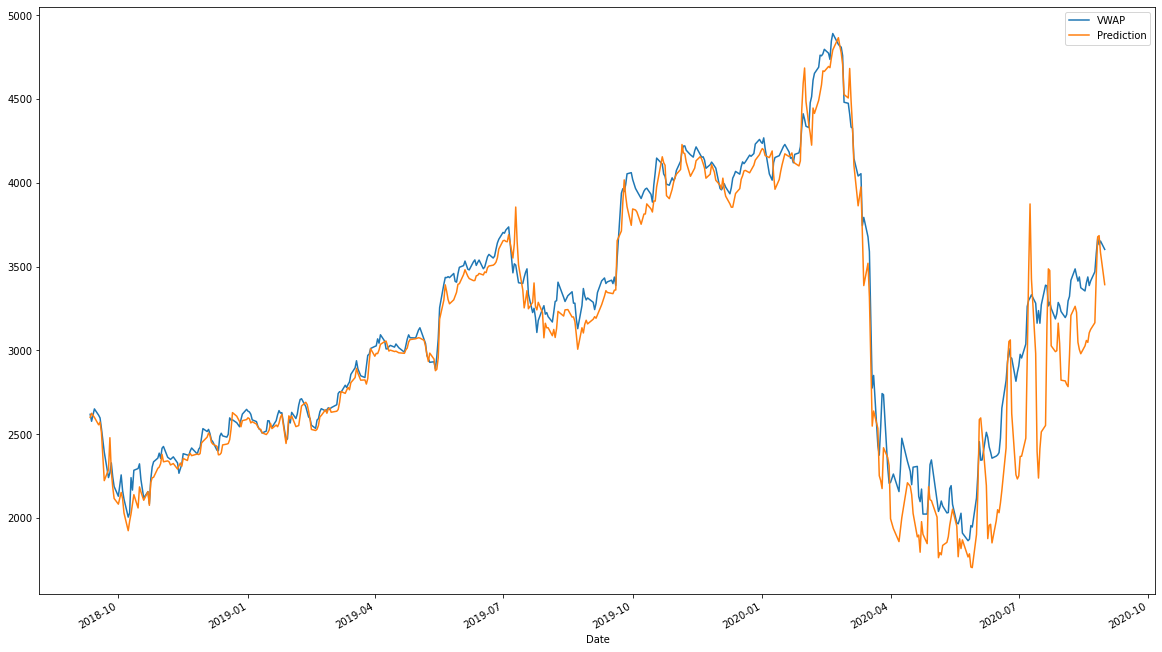

In [25]:
X_test[["VWAP","Prediction"]].plot(figsize=(20,12))

## Metrics

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [27]:
np.sqrt(mean_squared_error(X_test['VWAP'],X_test['Prediction']))

187.88224201884955

In [28]:
mean_absolute_error(X_test['VWAP'],X_test['Prediction'])

124.72494531693498

### We dont need the cross validation phase on these model because auto-arima model did it.